In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import xticks,yticks,np
import shap
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('./data/ads_3.csv')
X = df[df.columns[:62]]  #62 factors
Y = df[df.columns[62:]]  #12 targets

In [7]:
# 统计每一列的非0值
count = []

for column in range(64):
    temp = 0
    for index in range(len(df)):
        if df.iloc[index, column] != 0:
            temp = temp+1
    count.append(temp)

dic = {}
for i in range(64):
    dic[df.columns[i]] = count[i]

dic = dict(sorted(dic.items(), key=lambda x:x[1], reverse=False)) # save occurance frequency of factors

In [9]:
color_dic = {}   # save colors of sub_catagories
for i in range(64):
    if i < 20:
        color_dic[df.columns[i]] = "#FFF2CC"
    if i >= 20 and i < 31:
        color_dic[df.columns[i]] = "#FCE4D6"
    if i >= 31 and i < 46:
        color_dic[df.columns[i]] = "#C4D4E2"
    if i >= 46 and i < 52:
        color_dic[df.columns[i]] = "#92D050"
    if i >= 52 :
        color_dic[df.columns[i]] = "#D3B5E9"
    
# color = []
# for i in dic.keys():
#     color.append(color_dic[i])



## 1. Feature importance and occurrence frequency for Clear.Brand

In [28]:
df = pd.read_csv("./result/_feature_importance.csv")
data = df.iloc[0]

importance_dic = {}
for i in range(1,63):
    importance_dic[data.index[i]] = round(data[i],3)


In [34]:
importance_dic = dict(sorted(importance_dic.items(), key=lambda x:x[1], reverse=False))
occurance = []
for i in list(importance_dic.keys()):
    occurance.append(dic[i])
occurance

color = []
for i in importance_dic.keys():
    color.append(color_dic[i])

x = []
for i in importance_dic.keys():
    x.append(i+" "+str(importance_dic[i]))

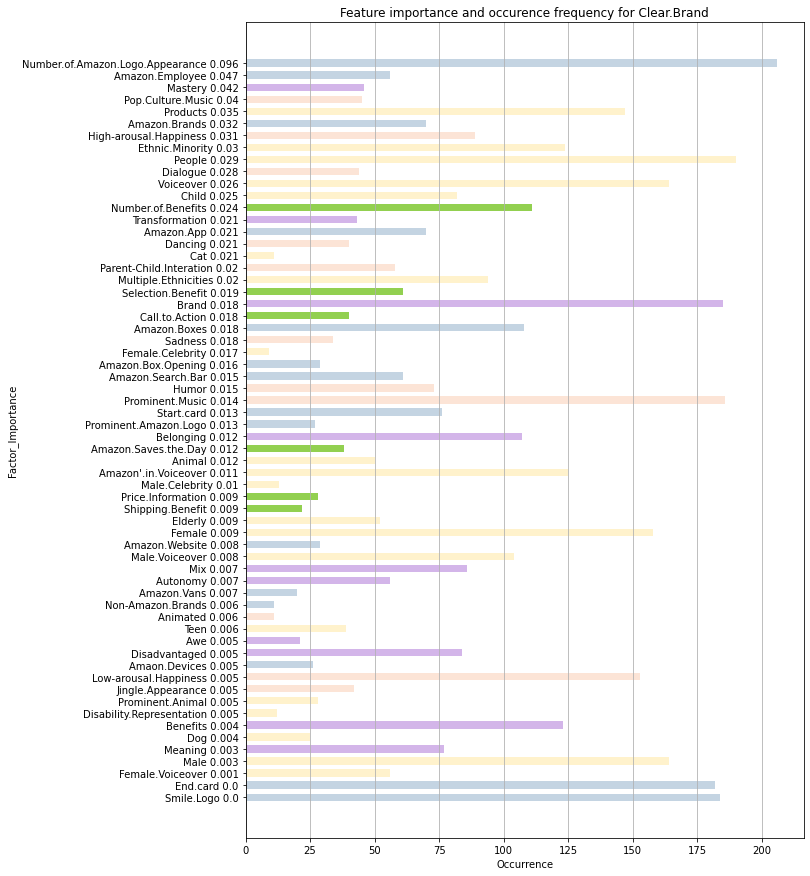

In [43]:
x = np.array(x)
y = np.array(occurance)
plt.subplots(figsize=(10, 15))
plt.title("Feature importance and occurence frequency for Clear.Brand")
plt.ylabel("Factor_Importance")
plt.xlabel("Occurrence")
plt.grid(axis='x')
plt.barh(x,y,height=0.6, color = color)
# plt.savefig("./plots/statistic_sub_gategory.png")
plt.show()

## 2. Feature importance and occurrence frequency for Message.Delivery

In [ ]:
df = pd.read_csv("./result/_feature_importance.csv")
data = df.iloc[0]

importance_dic = {}
for i in range(1,63):
    importance_dic[data.index[i]] = round(data[i],3)

importance_dic = dict(sorted(importance_dic.items(), key=lambda x:x[1], reverse=False))
occurance = []
for i in list(importance_dic.keys()):
    occurance.append(dic[i])
occurance

color = []
for i in importance_dic.keys():
    color.append(color_dic[i])

x = []
for i in importance_dic.keys():
    x.append(i+" "+str(importance_dic[i]))


x = np.array(x)
y = np.array(occurance)
plt.subplots(figsize=(10, 15))
plt.title("Feature importance and occurence frequency for Clear.Brand")
plt.ylabel("Factor_Importance")
plt.xlabel("Occurrence")
plt.grid(axis='x')
plt.barh(x,y,height=0.6, color = color)
# plt.savefig("./plots/statistic_sub_gategory.png")
plt.show()

## 3. Feature importance and occurrence frequency for Clear

## 4. Feature importance and occurrence frequency for Understood

## 5. Feature importance and occurrence frequency for Reputation

## 6. Feature importance and occurrence frequency for Relevant

## 7. Feature importance and occurrence frequency for See.Again

## 8. Feature importance and occurrence frequency for Like

## 9. Feature importance and occurrence frequency for Dislike

## 10. Feature importance and occurrence frequency for Purchase

## 11. Feature importance and occurrence frequency for Recommend

## 12. Feature importance and occurrence frequency for Branding.Correct.Recall

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate#交叉验证
# from imblearn.over_sampling import RandomOverSampler #随机过采样
from sklearn.metrics import matthews_corrcoef
from tqdm import tqdm
import time
import pandas as pd
from sklearn import datasets
import math
import joblib
from sklearn import metrics
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./data/ads_3.csv")

X = df[df.columns[:62]]
Y = df[df.columns[62:]]

In [133]:
type(Y.columns[1])

str

In [3]:
# 统计每一列的非0值
count = []

for column in range(64):
    temp = 0
    for index in range(len(df)):
        if df.iloc[index, column] != 0:
            temp = temp+1
    count.append(temp)

dic = {}
for i in range(64):
    dic[df.columns[i]] = count[i]

dic = dict(sorted(dic.items(), key=lambda x:x[1], reverse=False)) # save occurance frequency of factors

In [10]:
color_dic = {}   # save colors of sub_catagories
for i in range(64):
    if i < 20:
        color_dic[df.columns[i]] = "#FFF2CC"
    if i >= 20 and i < 31:
        color_dic[df.columns[i]] = "#FCE4D6"
    if i >= 31 and i < 46:
        color_dic[df.columns[i]] = "#C4D4E2"
    if i >= 46 and i < 52:
        color_dic[df.columns[i]] = "#92D050"
    if i >= 52 :
        color_dic[df.columns[i]] = "#D3B5E9"

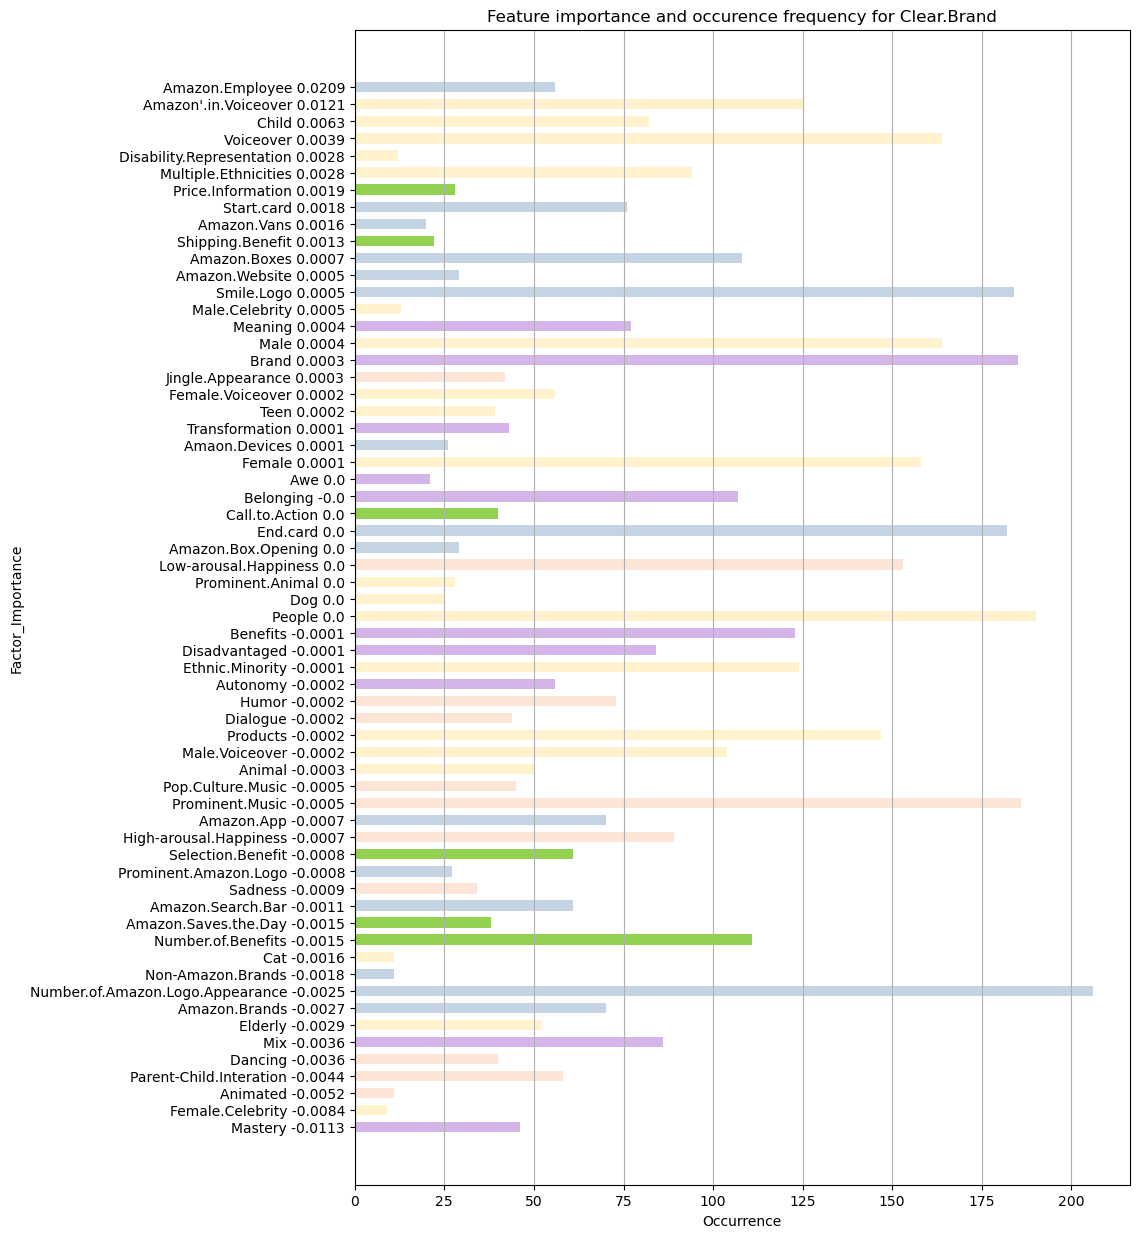

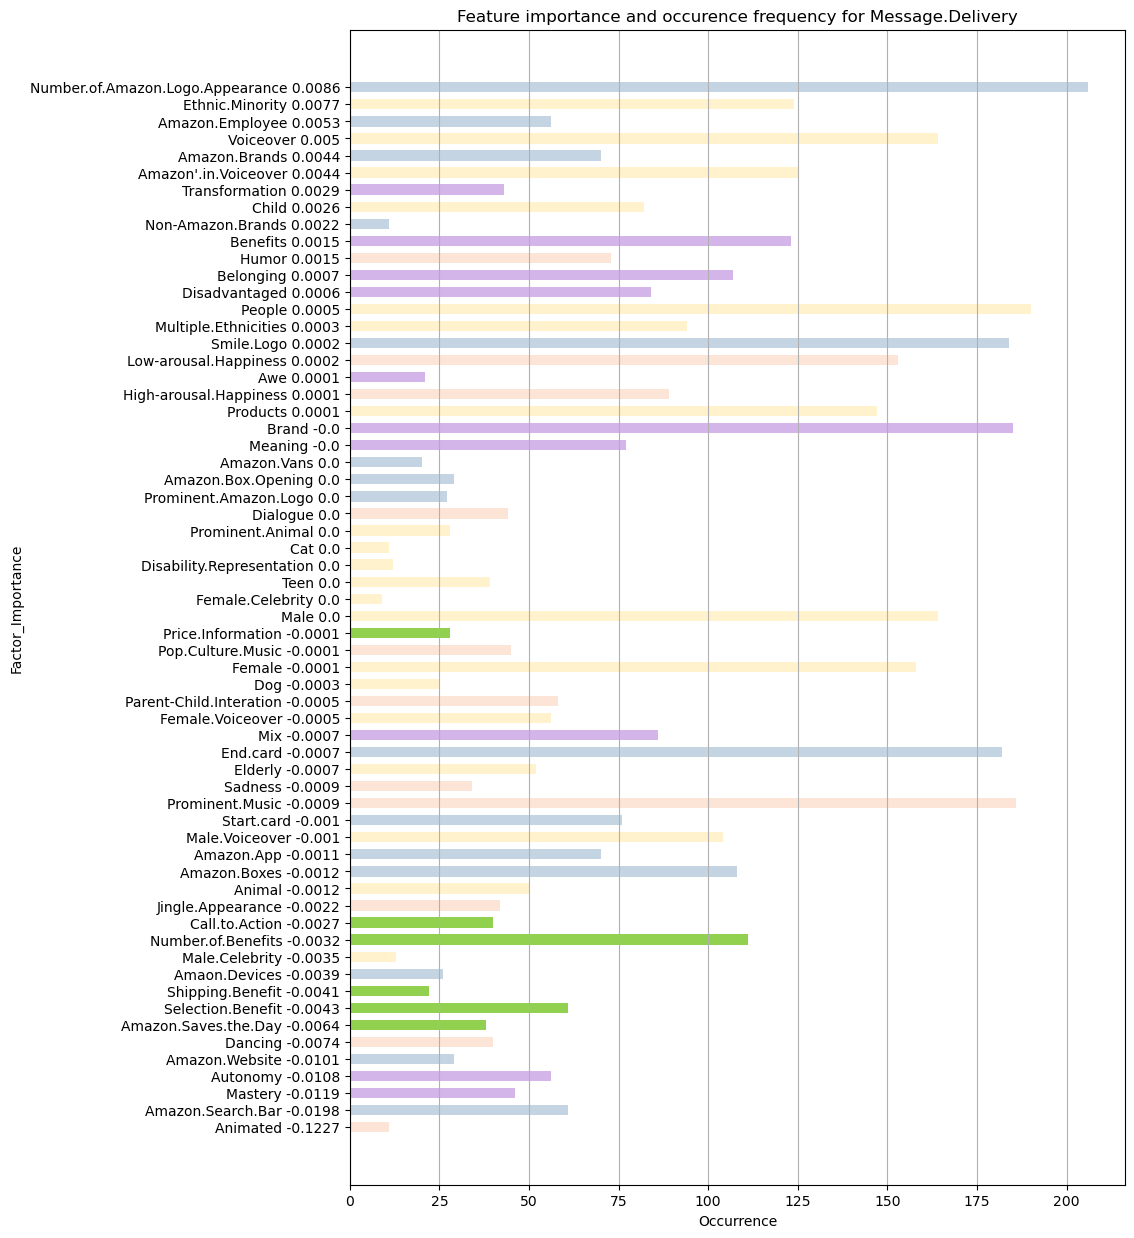

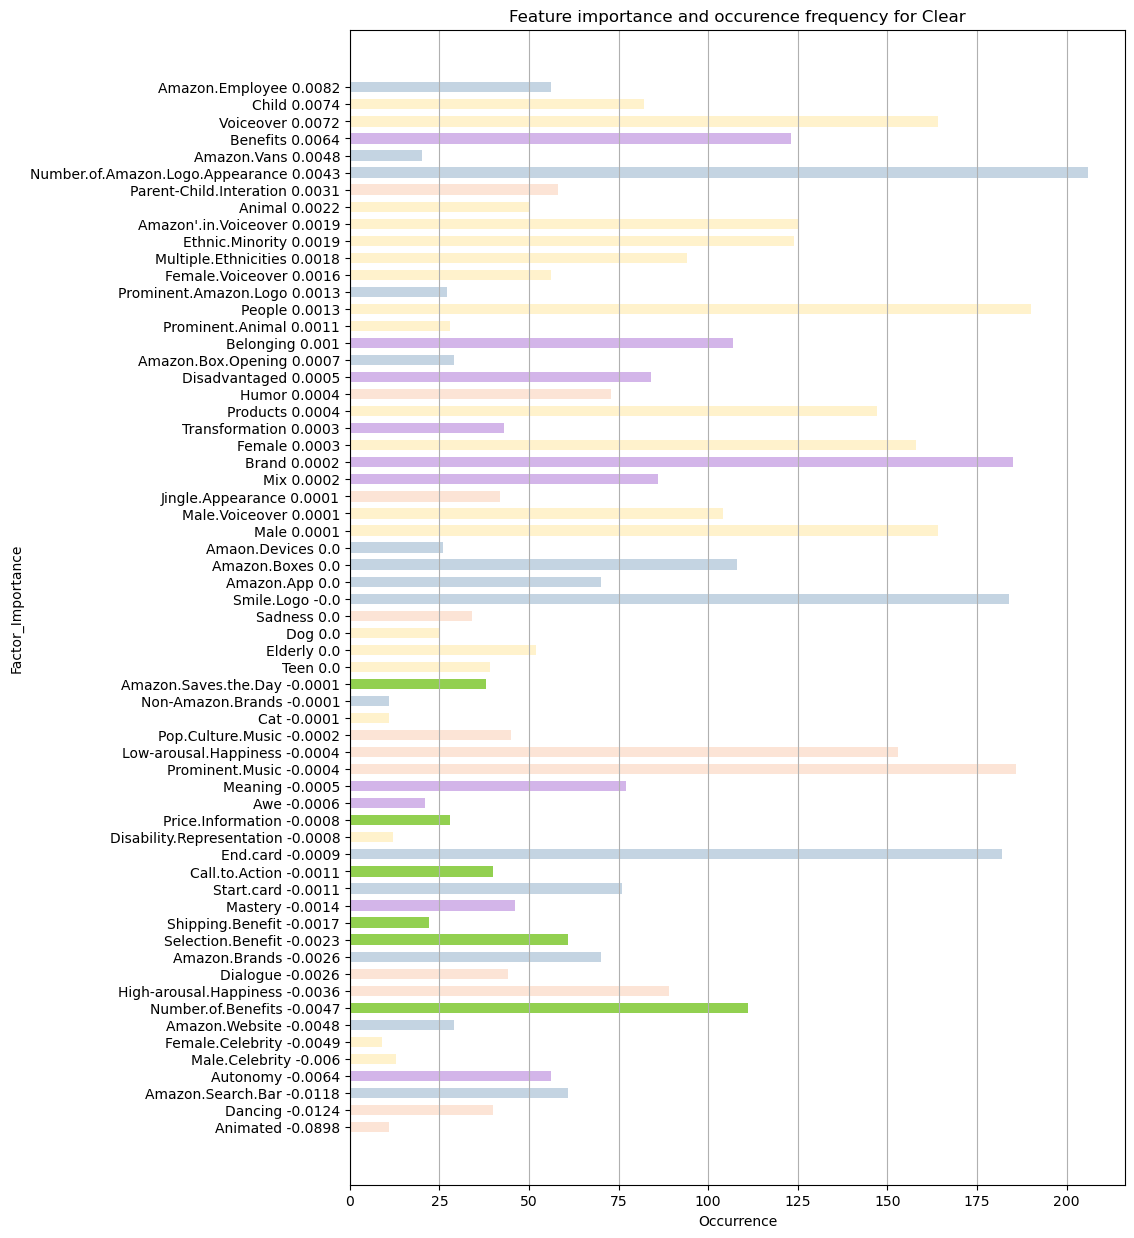

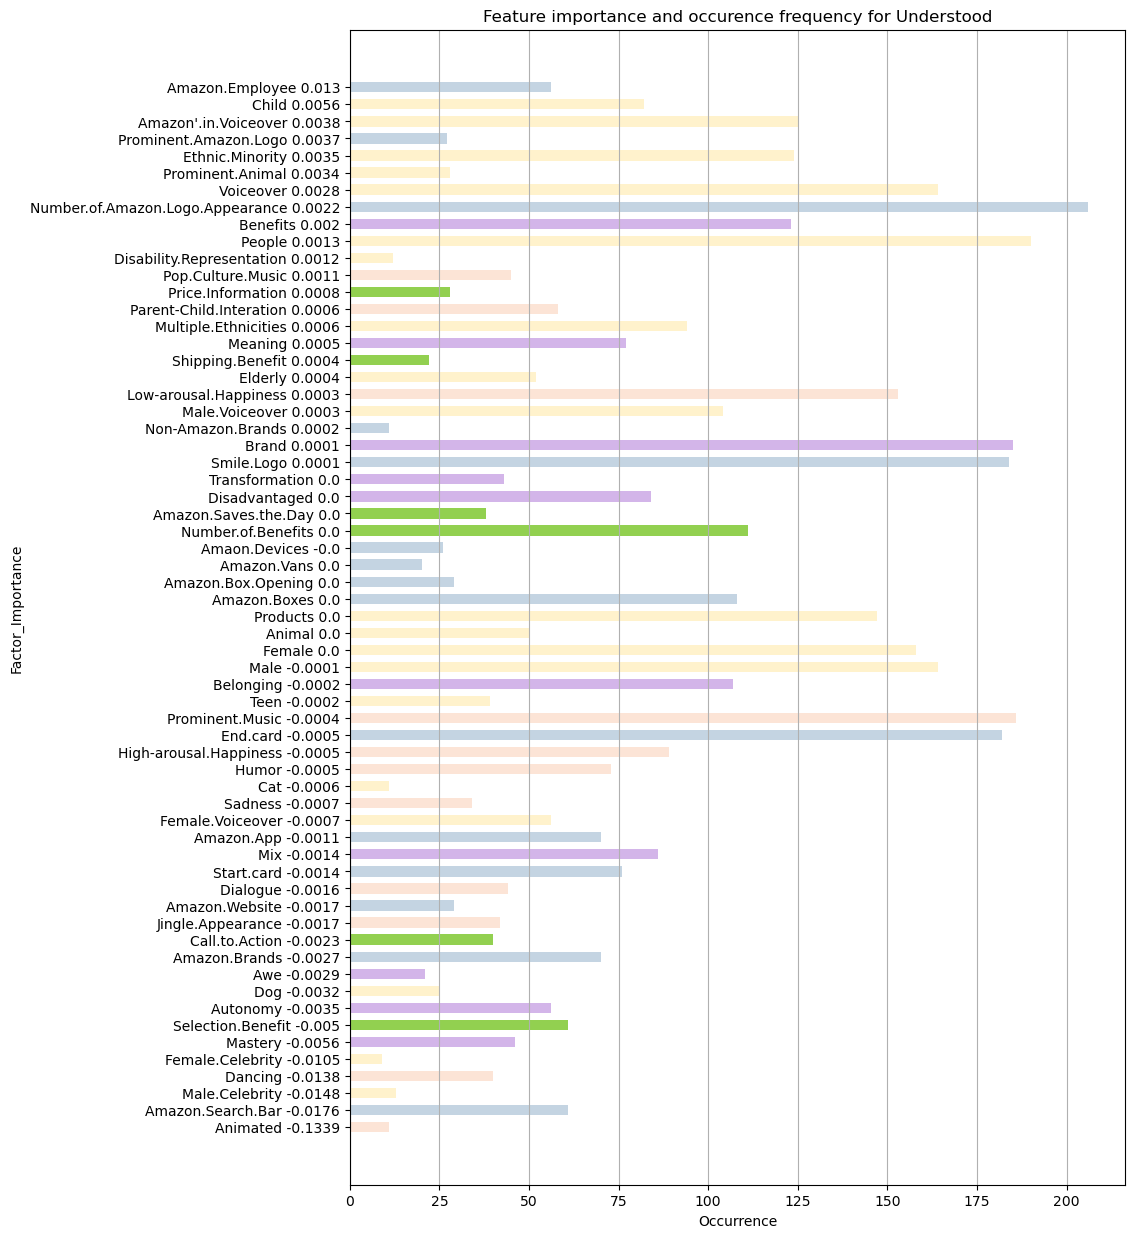

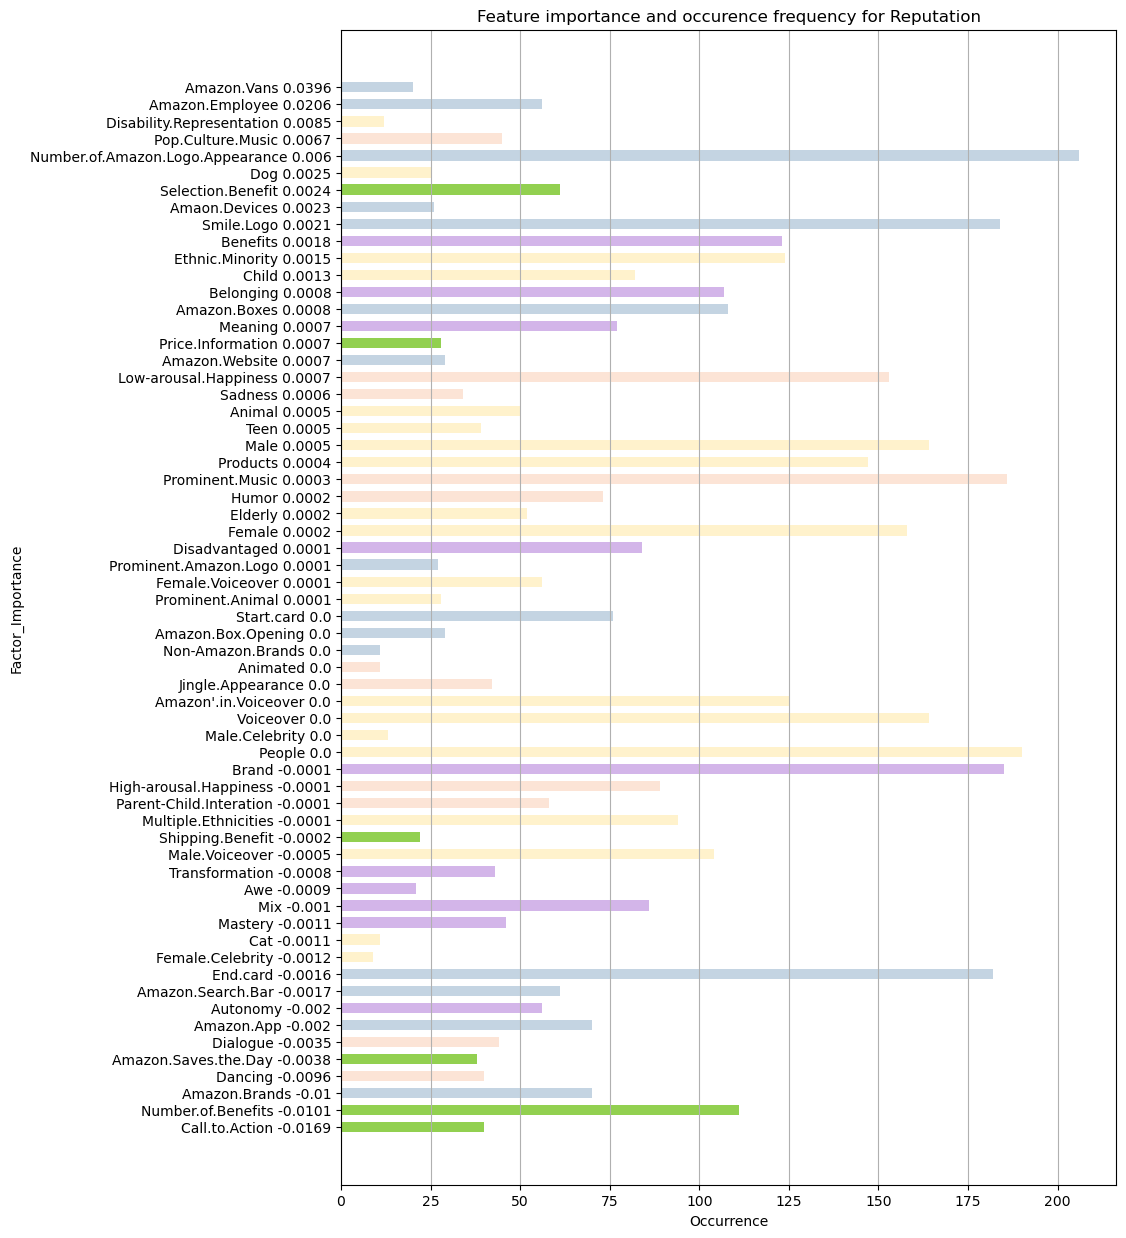

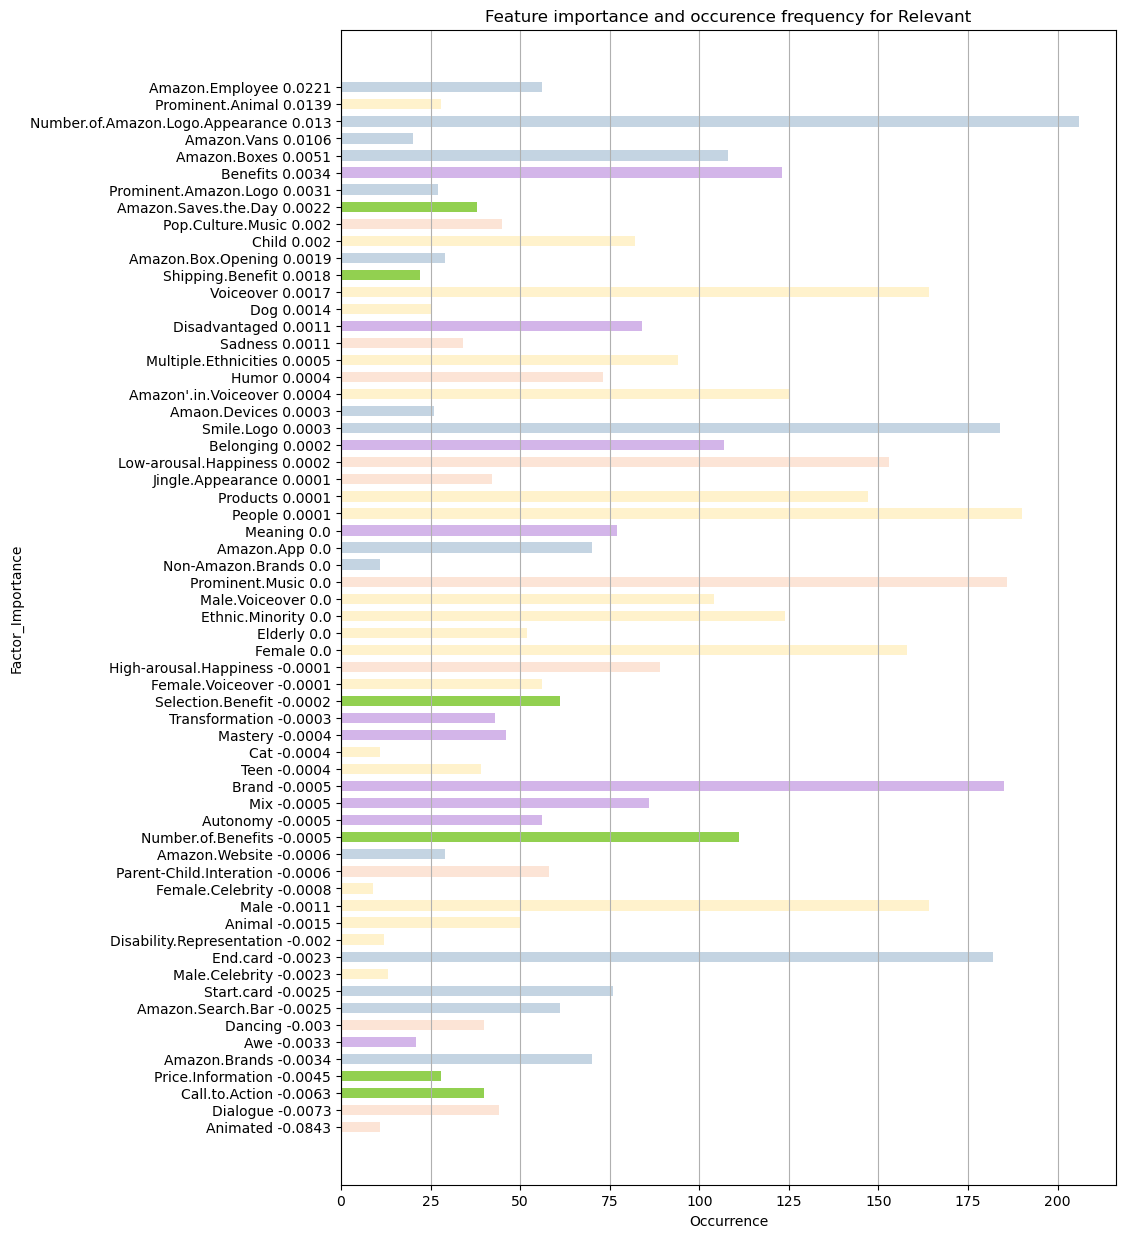

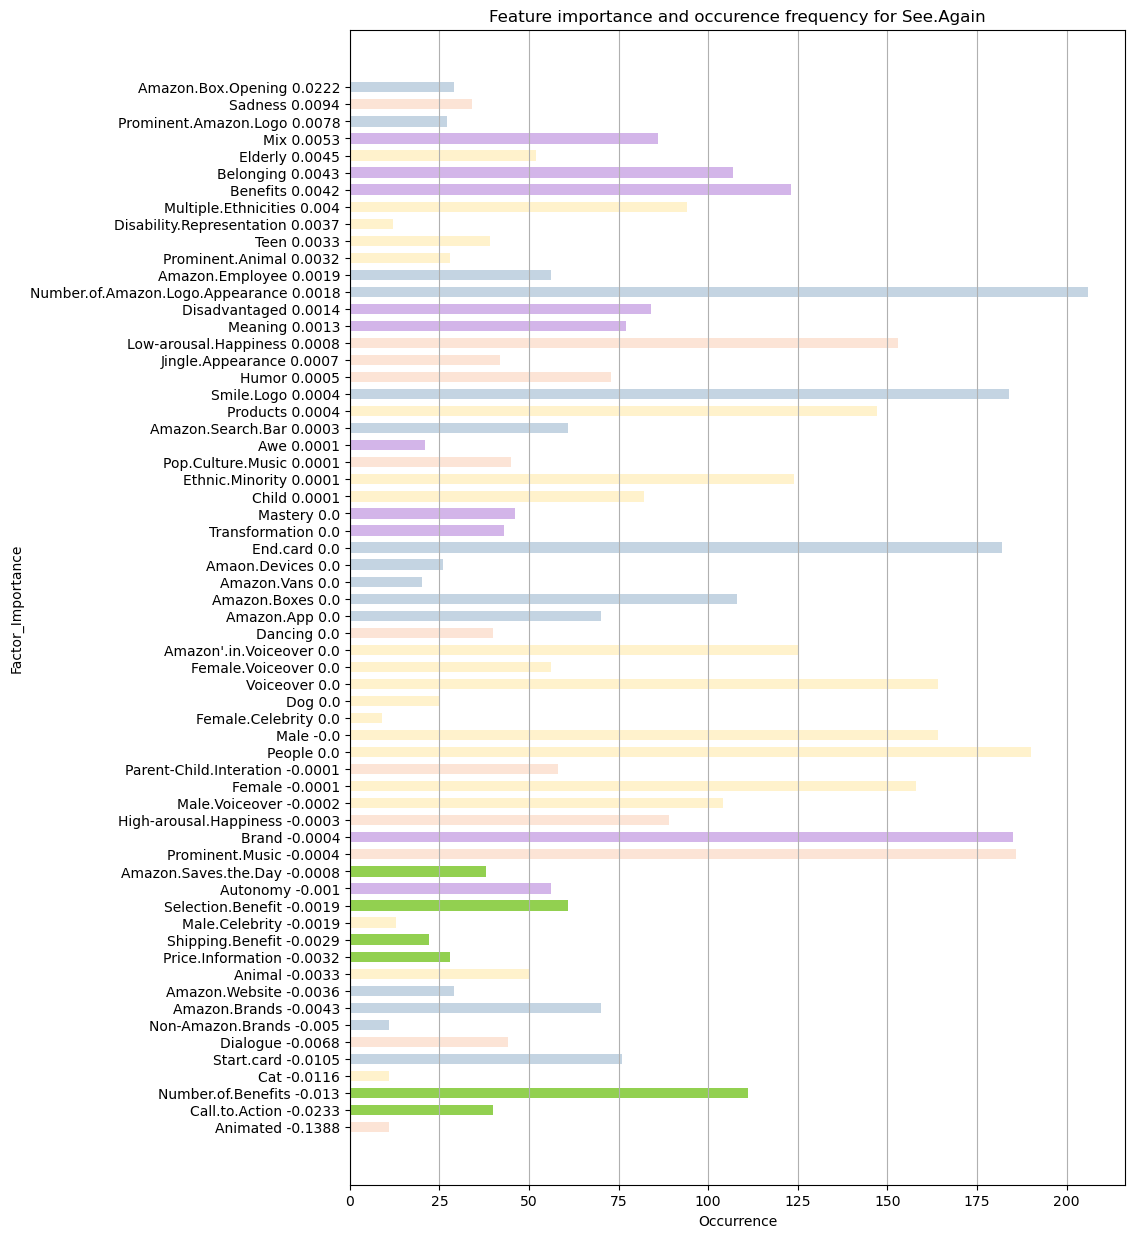

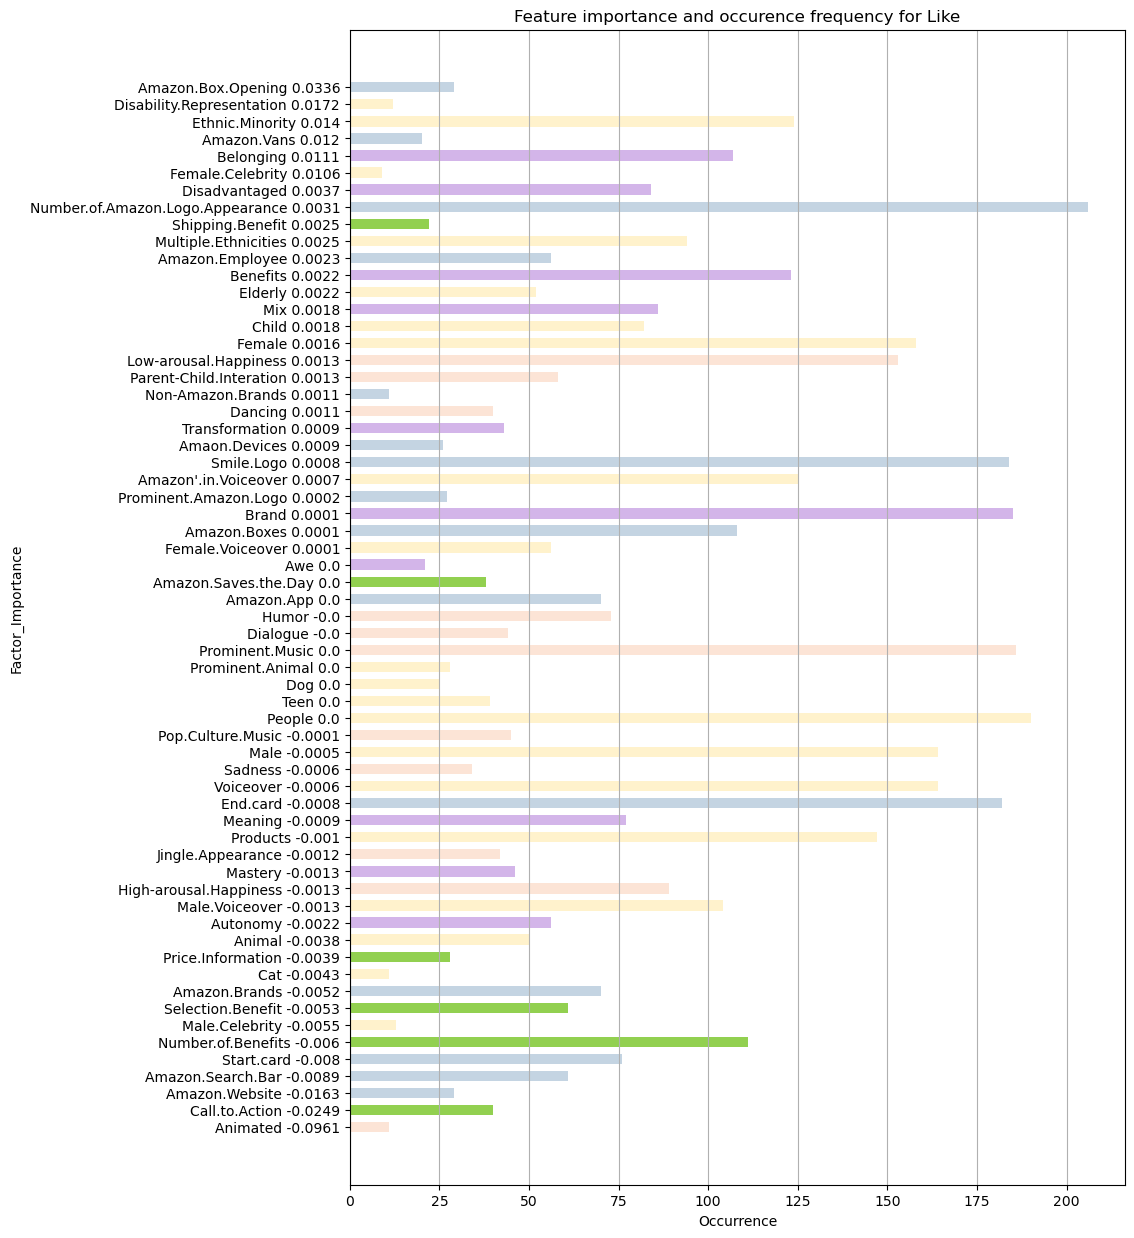

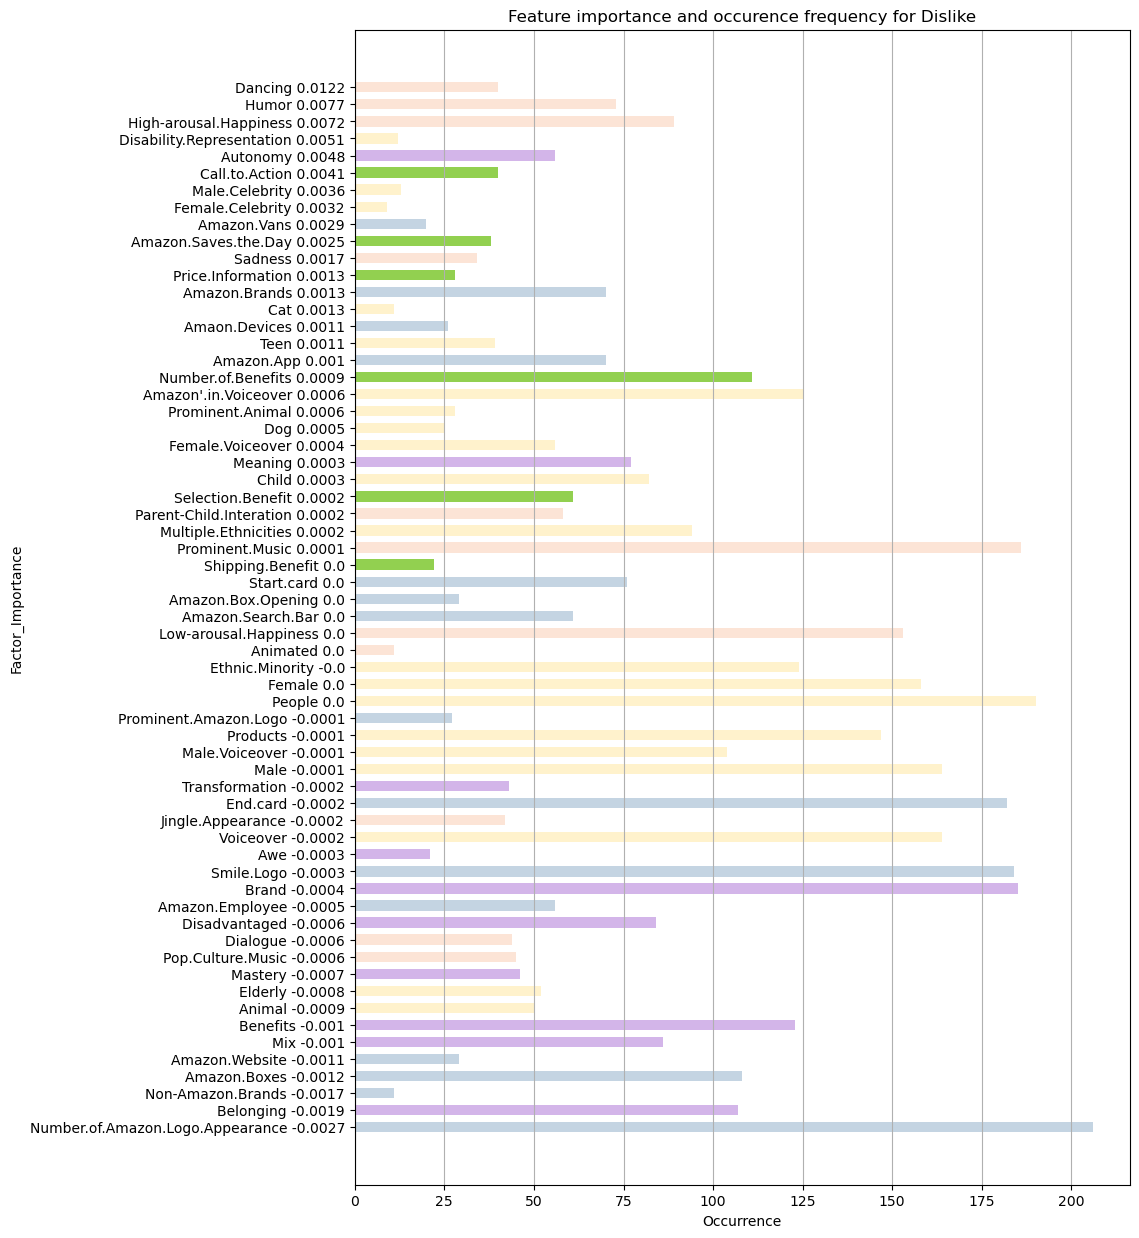

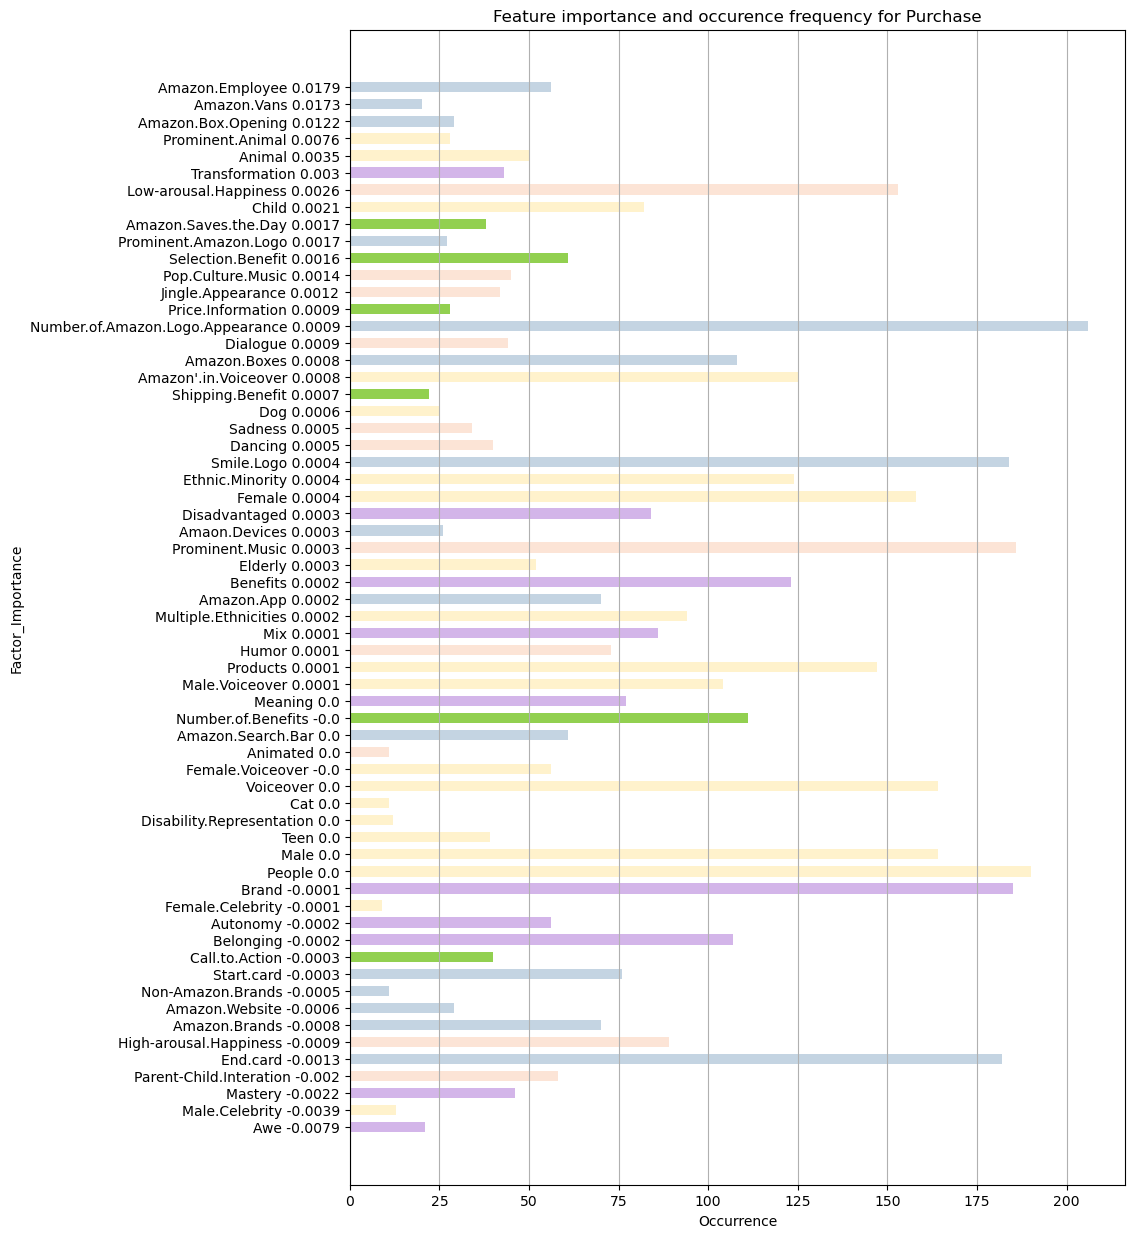

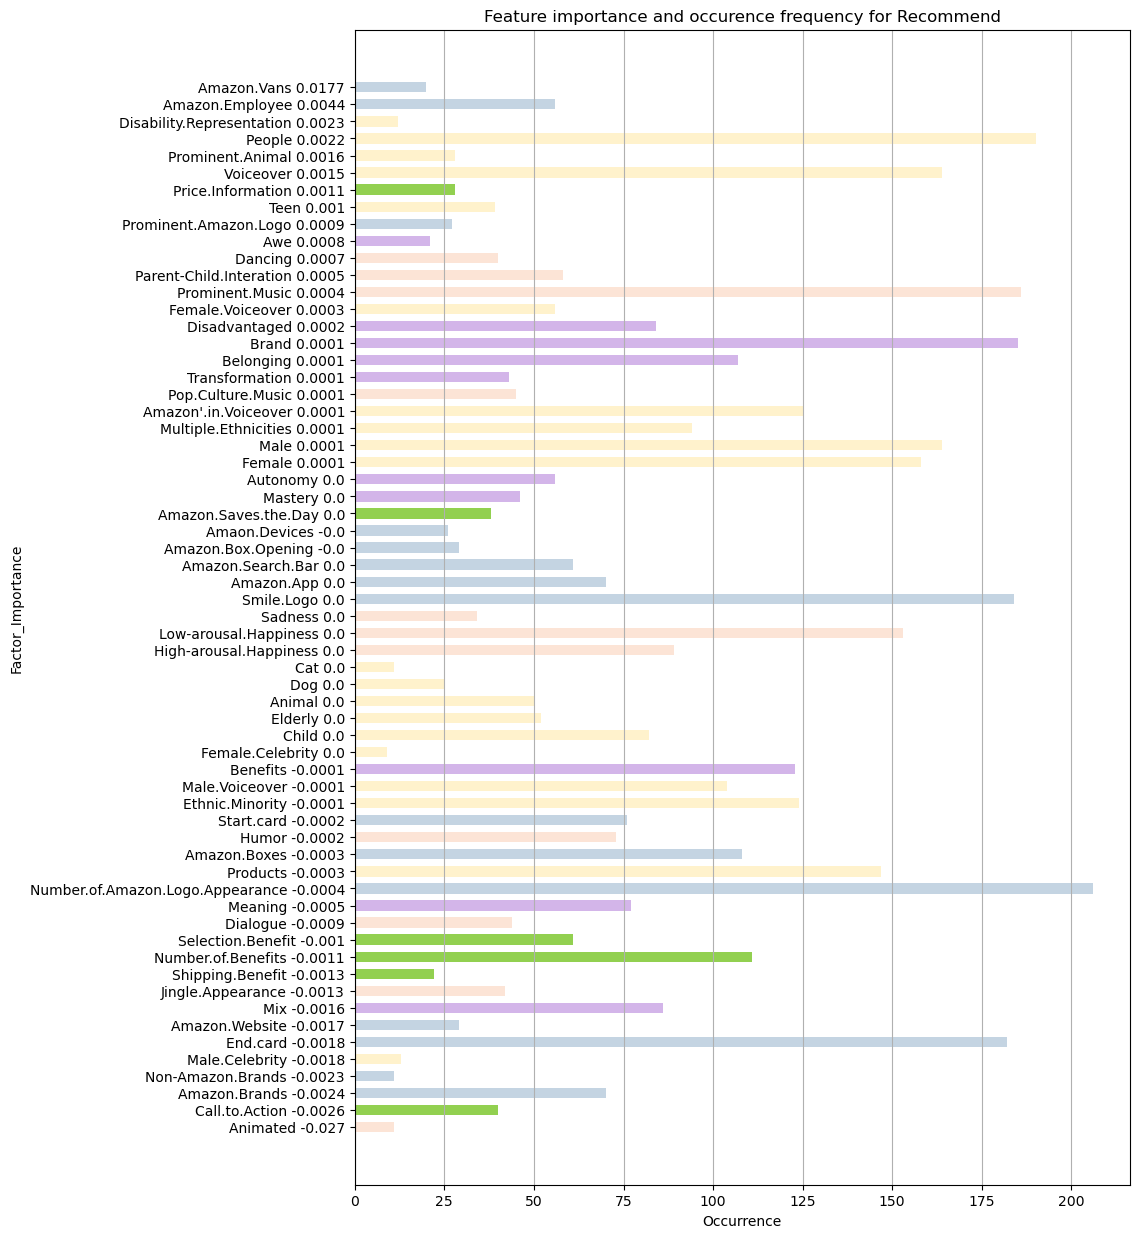

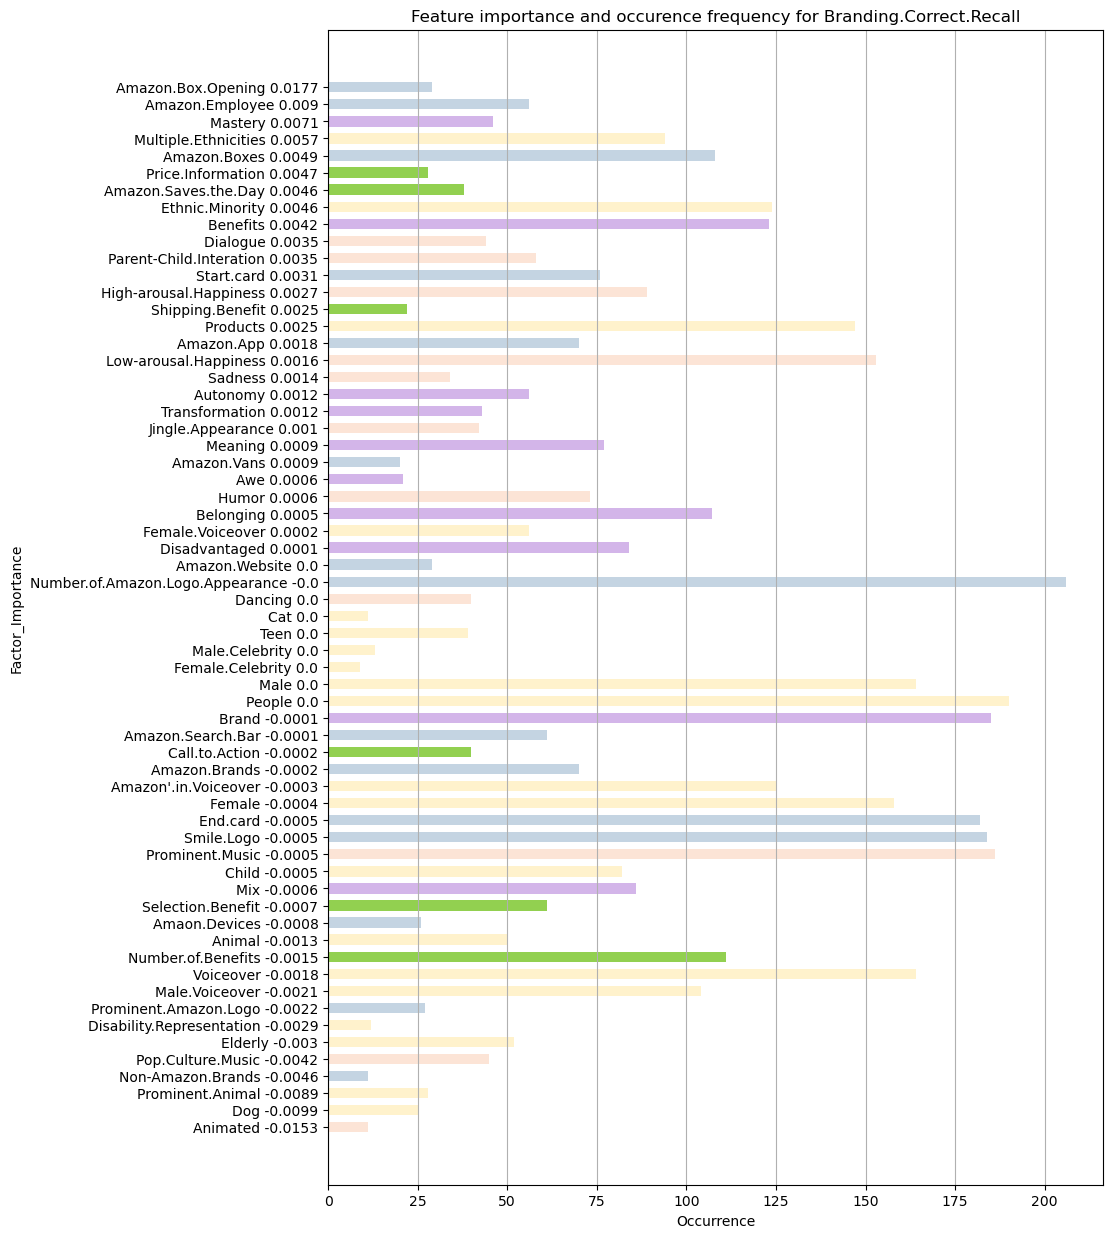

In [14]:


for index in range(12):
    y = Y[Y.columns[index]]
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    shuffle=True,
                                                    test_size=0.3,
                                                    random_state=0)
    RF_regression = RandomForestRegressor(n_estimators=15, max_depth=4)
    RF_regression.fit(X, y)

    shap_values = shap.TreeExplainer(RF_regression).shap_values(X)

    # shap.summary_plot(shap_values, X, show = False)
    # plt.savefig("./plots/feature/{}.png".format(Y.columns[i]))


    temp = np.array(shap_values) * np.array(X)
    importance_dic = {}

    for i in range(62):
        importance_dic[X.columns[i]] = round(temp[:,i].sum() / dic[X.columns[i]], 4)

    importance_dic = dict(sorted(importance_dic.items(), key=lambda x:x[1], reverse=False))
    occurance = []
    for i in list(importance_dic.keys()):
        occurance.append(dic[i])
    color = []
    for i in importance_dic.keys():
        color.append(color_dic[i])

    x = []
    for i in importance_dic.keys():
        x.append(i+" "+str(importance_dic[i]))

    x = np.array(x)
    y = np.array(occurance)
    plt.subplots(figsize=(10, 15))
    plt.title("Feature importance and occurence frequency for {}".format(Y.columns[index]))
    plt.ylabel("Factor_Importance")
    plt.xlabel("Occurrence")
    plt.grid(axis='x')
    plt.barh(x,y,height=0.6, color = color)
    # plt.savefig("./plots/feature/importance_occurrence_{}.png".format(index))

    





In [102]:
shap_values    =  shap.TreeExplainer(RF_regression).shap_values(X)
shap_values.shape
ar1 = np.array(shap_values)
ar2 = np.array(X)
ar = ar1 * ar2
ar[:,5].sum()/4
# shap.plots.bar(shap_values)

-0.0024312817548458442

In [103]:
global_importances = np.abs(shap_values).mean(0)[:-1]
global_importances

array([2.13216597e-04, 4.19486177e-04, 6.21906489e-03, 0.00000000e+00,
       0.00000000e+00, 3.00710784e-04, 1.24756284e-04, 9.95107873e-03,
       5.08785572e-03, 3.36634563e-03, 0.00000000e+00, 0.00000000e+00,
       7.49400789e-04, 0.00000000e+00, 2.15640035e-03, 3.21650223e-05,
       6.44310361e-04, 2.58603882e-03, 0.00000000e+00, 6.03286965e-03,
       5.71933280e-04, 1.81257970e-03, 2.09631214e-04, 4.58554354e-04,
       4.09422044e-03, 6.15181792e-04, 2.86895638e-03, 1.00498367e-03,
       9.97098574e-04, 2.21670570e-03, 3.22623250e-03, 4.18313961e-04,
       1.55022978e-03, 1.70197551e-03, 2.97154865e-03, 1.59397405e-03,
       3.42035580e-03, 2.85377000e-04, 6.36477532e-05, 2.29717753e-03,
       3.88390731e-04, 8.13957426e-04, 2.08254329e-04, 2.29328610e-03,
       7.63308706e-04, 1.71303743e-03, 6.20091750e-04, 4.34553168e-04,
       1.14654196e-03, 1.48475448e-04, 5.94694822e-04, 1.53923101e-04,
       0.00000000e+00, 2.52341530e-03, 1.05779381e-03, 0.00000000e+00,
      

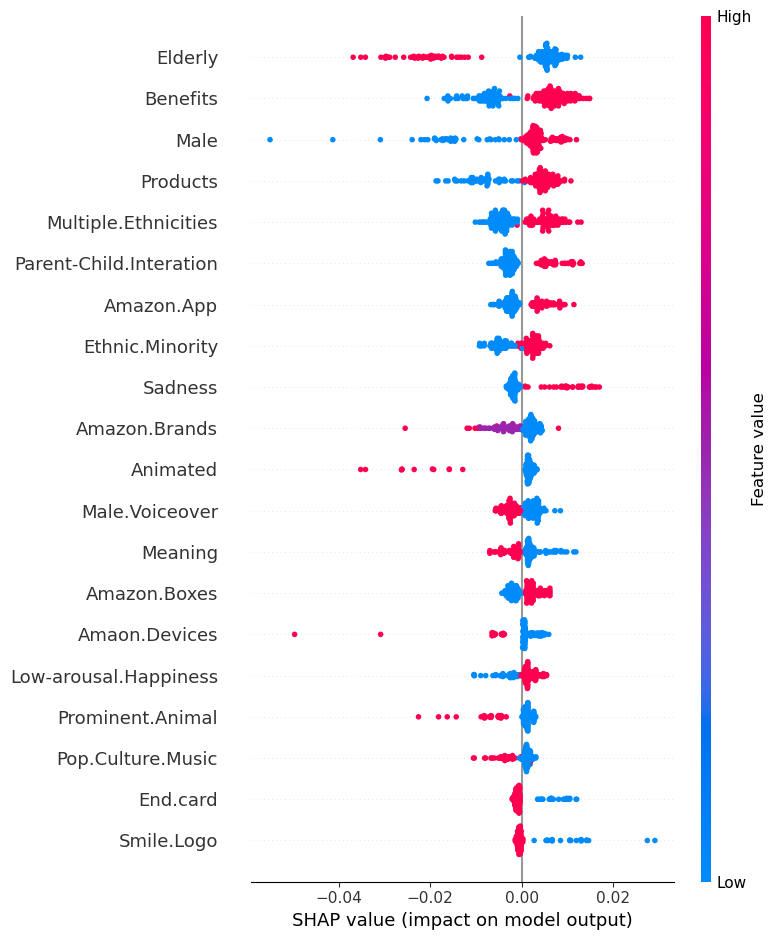

In [108]:
shap.summary_plot(shap_values, X, show = False)
plt.savefig("./plots/brand.png")

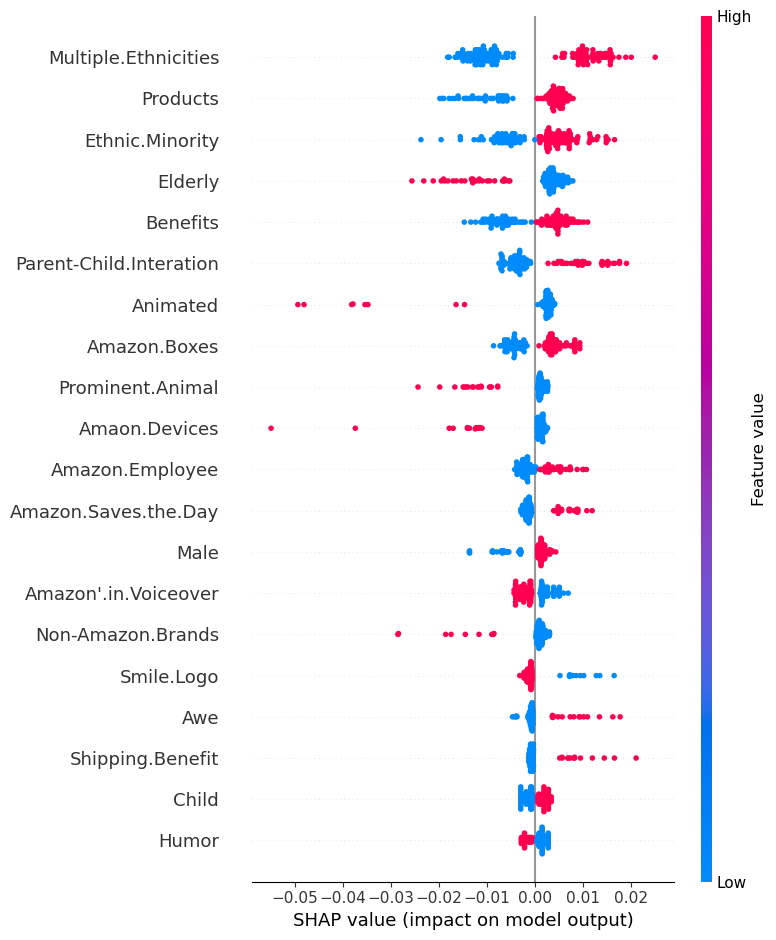

In [81]:
shap.summary_plot(shap_values, X_train)